In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set(rc={'figure.figsize':(11.7,8.27)})

import warnings
warnings.simplefilter("ignore")

In [2]:
from sklearn.datasets import load_iris

In [3]:
X, y = load_iris(return_X_y=True)
df = pd.DataFrame(X)
df['y'] = y

In [4]:
df.head()

,0,1,2,3,y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Основы статистики

## Гениральная совокупность и выборка 
Гениральная совокупность - это множество объектов относительно которых мы делаем выводы\
Выборка - это часть гениральной совокупности

### Простая случайная выбоорка:

In [5]:
def simple_random_sample(data, n_samples_len):
    ind = np.random.randint(0, len(data), (int(n_samples_len)))
    return data.iloc[ind]

In [6]:
simple_random_sample(df, 5)

,0,1,2,3,y
62,6.0,2.2,4.0,1.0,1
147,6.5,3.0,5.2,2.0,2
33,5.5,4.2,1.4,0.2,0
38,4.4,3.0,1.3,0.2,0
24,4.8,3.4,1.9,0.2,0


### Стратифицированная выборка:
- смысл этого метода в разделении ГС на страты для выбора экземпляров из каждой страты\
Например можно разделить ГС по полу человека или по возросту и уже из этих групп выбирать экземпляры

### Группова выборка:
- ГС делится на ряд непересекающихся исчерпывающих ее подмножеств и производится случайный отбор подмножеств.

# Типы переменных
- номенативные 
- количественные 
- ранговые

In [7]:
n = df[[2]] # количесвтенная переменна
n.head(4)

,2
0,1.4
1,1.4
2,1.3
3,1.5


In [8]:
n = n.sort_values(by=2) # проранжированная переменная 
n.head(4)

,2
22,1.0
13,1.1
14,1.2
35,1.2


In [9]:
n['sr'] = n[2].apply(lambda x: True if x>n[2].median() else False) #номенативная переменная
n.head(4)

,2,sr
22,1.0,False
13,1.1,False
14,1.2,False
35,1.2,False


## Меры центральной тенденции 

- Мода - значение измеряемого признака, которое встречается максимально часто 
- Медиана - значение которое делит упорядоченную последовательность пополам
- Среднее значение - сумма всех значений деленное на их количество

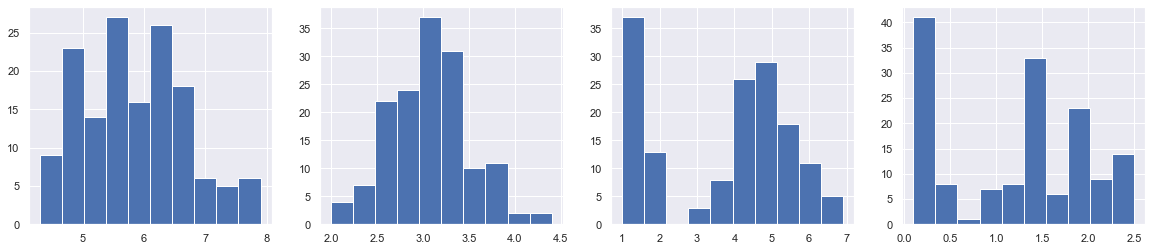

In [10]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 4))
ax1, ax2, ax3, ax4 = axes

ax1.hist(df[0])
ax2.hist(df[1])
ax3.hist(df[2])
ax4.hist(df[3])
plt.show()

In [11]:
for i in df.columns[:-1]:
    print(f'---------------------{i}---------------------')
    print(f"mode = {df[i].mode()[0]}    median = {df[i].median()}    mean = {round(df[i].mean(), 2)}")

---------------------0---------------------
mode = 5.0    median = 5.8    mean = 5.84
---------------------1---------------------
mode = 3.0    median = 3.0    mean = 3.06
---------------------2---------------------
mode = 1.4    median = 4.35    mean = 3.76
---------------------3---------------------
mode = 0.2    median = 1.3    mean = 1.2


### Свойства среднего

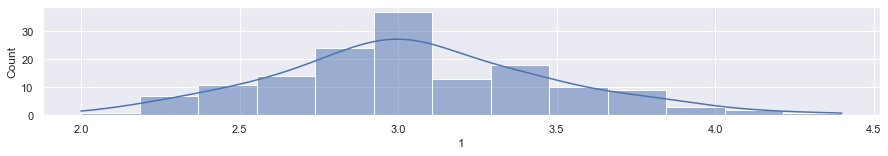

In [12]:
sr = df[1]
plt.figure(figsize=(15,2))
sns.histplot(sr, kde=True);

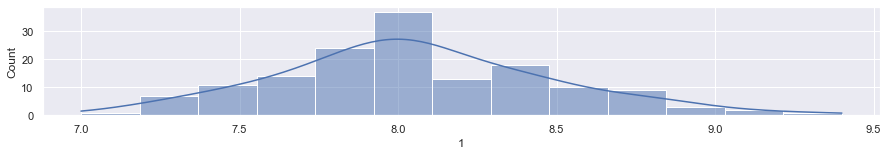

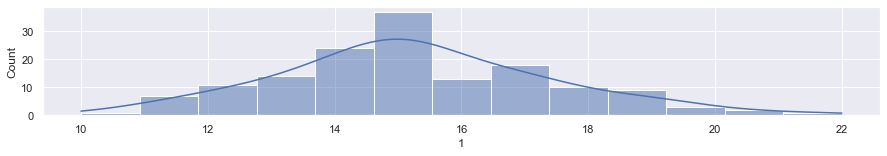

In [13]:
# прибавление константы
plt.figure(figsize=(15,2))
sns.histplot(sr+5, kde=True);

# умножение на константу
plt.figure(figsize=(15,2))
sns.histplot(sr*5, kde=True);

In [14]:
sr = pd.DataFrame(sr)
sr['mean'] = sr[1].mean()
sr['substract'] = round(sr[1]-sr['mean'])
sr.head()

,1,mean,substract
0,3.5,3.057333,0.0
1,3.0,3.057333,-0.0
2,3.2,3.057333,0.0
3,3.1,3.057333,0.0
4,3.6,3.057333,1.0


In [15]:
print('Сумма разниц всех значений и среднего равна нулю')
sum(sr['substract'])

Сумма разниц всех значений и среднего равна нулю


0.0

## Меры изменчивости
- Размах - это разница между максимальным и минимальным значением
- Дисперсия - средний квадрат отклонения каждого значения признака от их средней велечины
- Нормальное отклонение - это корень из дисперсии 

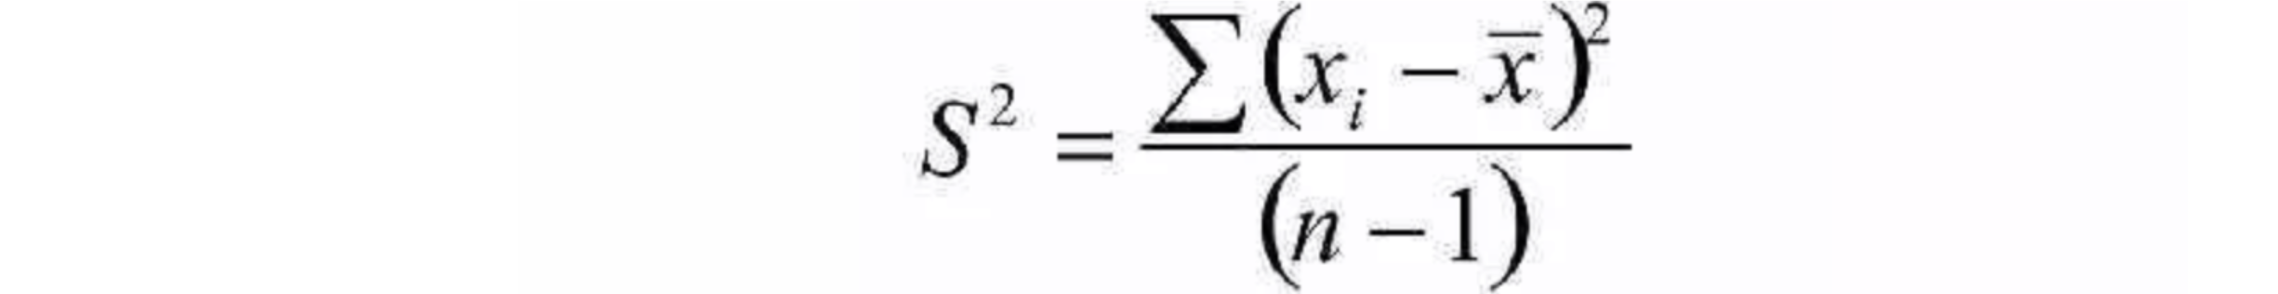

In [16]:
def disp(listx):
    sr = sum(listx)/len(listx)
    sum_sub = 0
    for i in listx:
        sum_sub = sum([sum_sub, np.square(i-sr)])
    return sum_sub/(len(listx)-1)

disp(df[1])

0.1899794183445188

In [17]:
# среднее отклонение
df[1].std()

0.435866284936698

In [18]:
# дисперсия
np.square(df[1].std())

0.1899794183445188

## Квартили распределения 
Квартили - это три точки(значение признака) которые делят упорядоченное множесвто данных на 4 ровные части

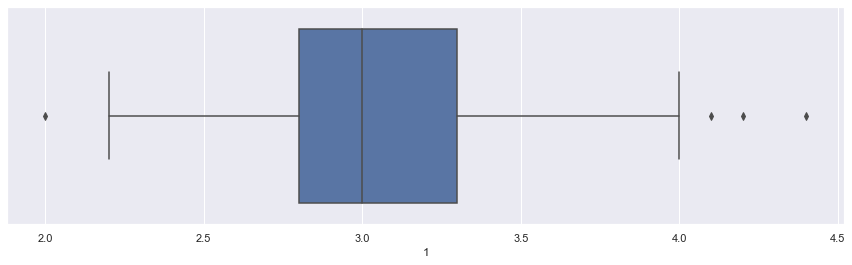

In [19]:
plt.figure(figsize=(15,4))
sns.boxplot(df[1]);

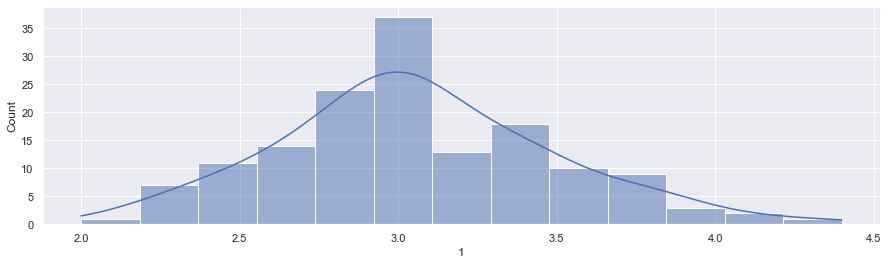

In [20]:
# Можно заметить сходство с распределением 
plt.figure(figsize=(15,4))
sns.histplot(df[1], kde=True);

In [21]:
# Функция для поиска квантиля 
df[1].quantile()

3.0

## Нормальное распределение
Нормальное распределение - это функция плотности вероятности, которое задается функцией Гаусса 
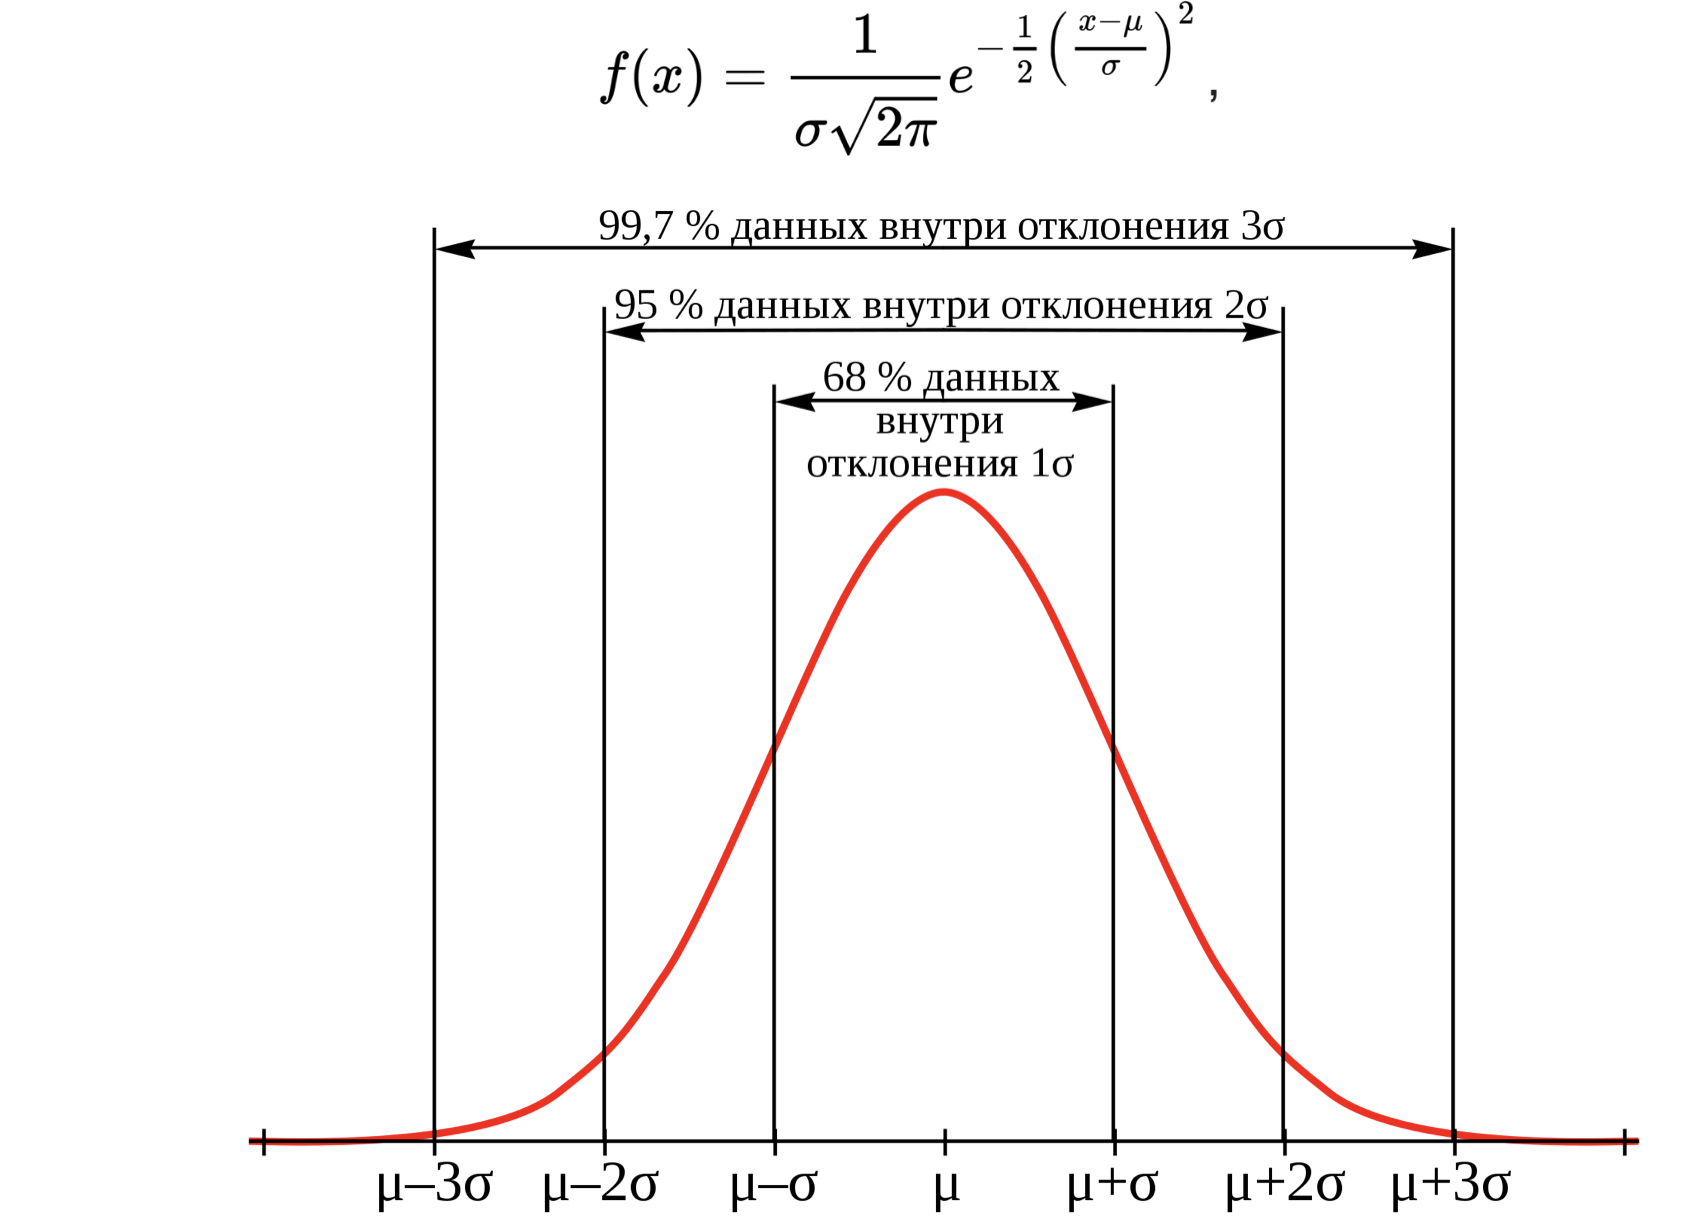
Правило трёх сигм(3σ) — практически все значения нормально распределённой случайной величины лежат в интервале:
(μ-3σ;μ+3σ)

### Z-преобразование 
Стандартизированная оценка (z-оценка, англ. : Standard score, z-score) - это мера относительного разброса наблюдаемого или измеренного значения, которая показывает, сколько стандартных отклонений составляет его разброс относительного среднего значения.
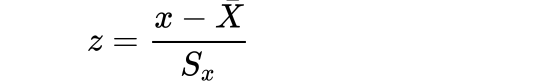

				Распределение приближенное к нормальному


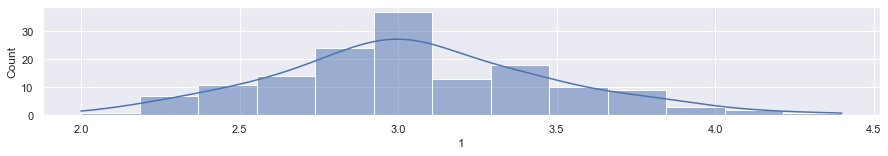

					Z-преобразование


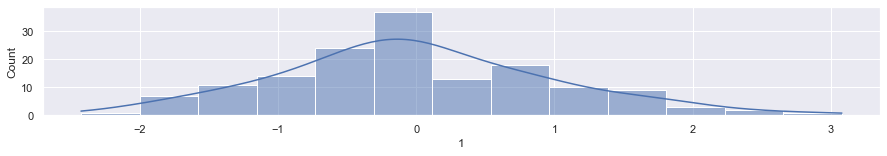

In [28]:
print('\t\t\t\tРаспределение приближенное к нормальному')
plt.figure(figsize=(15,2))
sns.histplot(df[1], kde=True);
plt.show()
print('\t\t\t\t\tZ-преобразование')
z = (df[1] - df[1].mean())/df[1].std()
plt.figure(figsize=(15,2))
sns.histplot(z, kde=True);

## ЦПТ - центральная предельная теорема
- Если многократно извлекать выборки из ГС, то среднее всех средних будет стрмиться к среднему генеральной совокупности 
- Чем больше наблюдений, тем более близко к среднему 
$$ SE = {σ \over \sqrt{n}} $$
SE - ошибка среднего\
n - число наблюдений


In [45]:
# докажем теорему на практике 
data = df[1]
data_std = data.std()
print(f'data_std = {data_std}')
sample_std = []

for i in range(1000):
    data_i = simple_random_sample(df[1], 10)
    sample_std.append(data_i.std())
    
print(f'sample_std = {np.mean(sample_std)}')

data_std = 0.435866284936698
sample_std = 0.4237559384927227


## Доверительные интервалы 
Доверительный интервал показывает насколько параметры из выборочной совокупности отличаются от ГС, используется ошибка репрезентативности, в которой коэффициент Стьюдента выбирает исследователь(1,2,3 - соответсвенно 68, 95 и 99 % соответственно)
Например если t=2, то с вероятностью 95% среднее значение ГС попадает в интервал вокруг выборочной средней 
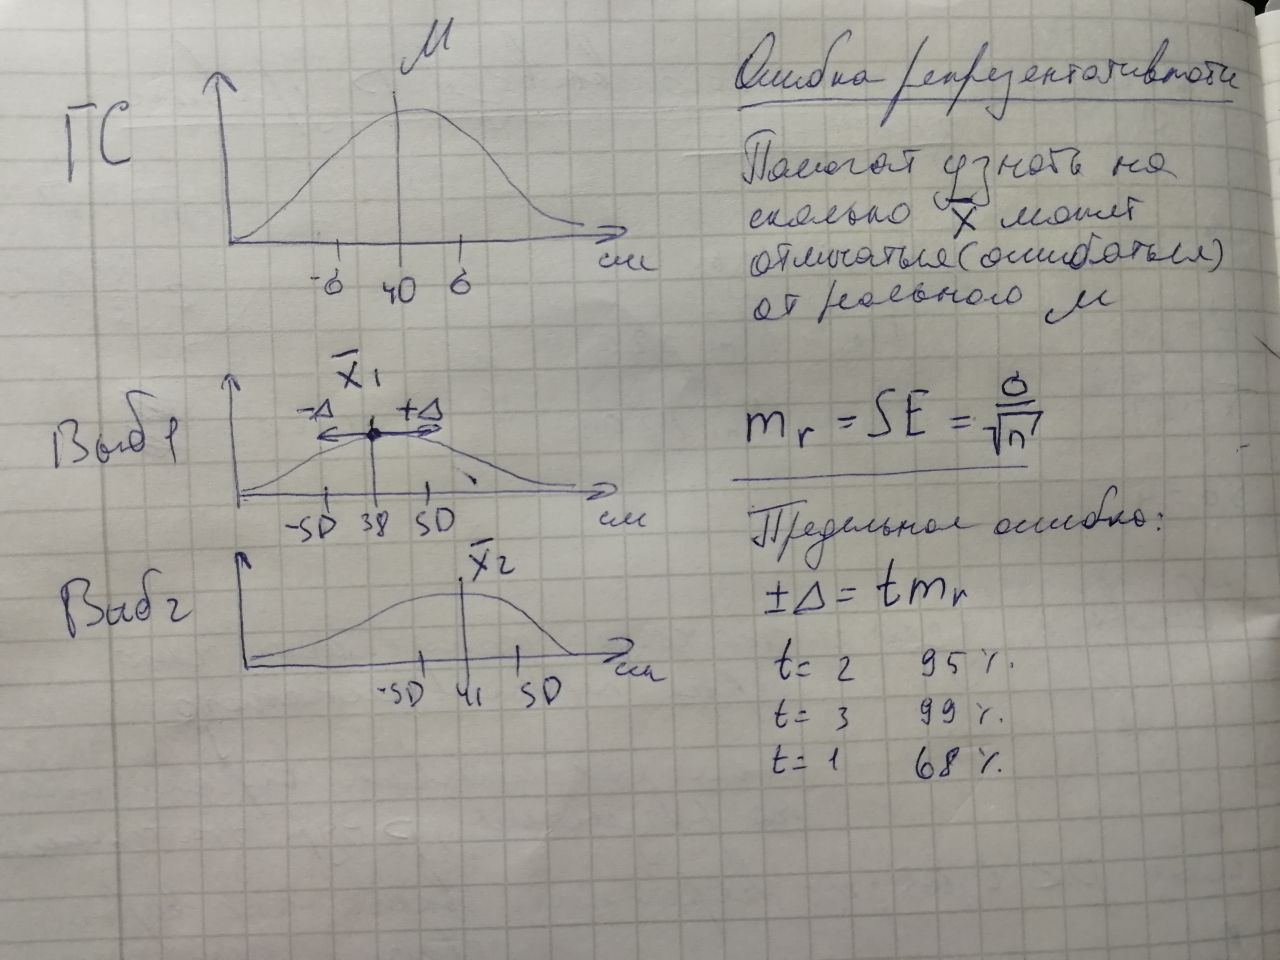

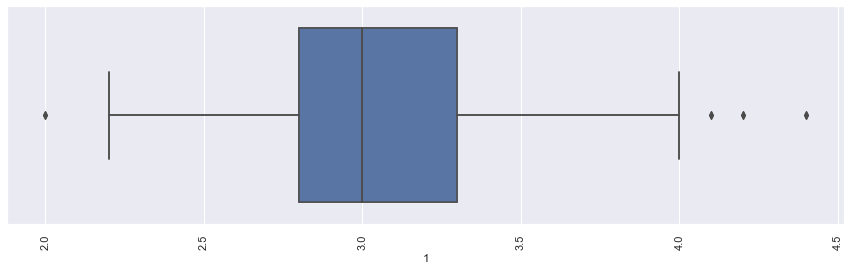

In [50]:
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(df[1])
fig = sns.boxplot(df[1])
plt.xticks(rotation=90);

-----------ГС-----------


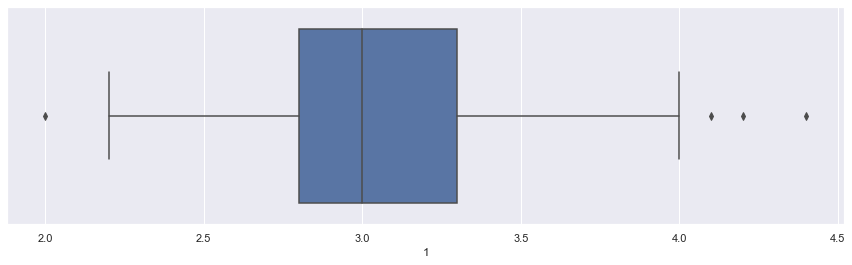

-----------ВЫБОРКИ-----------


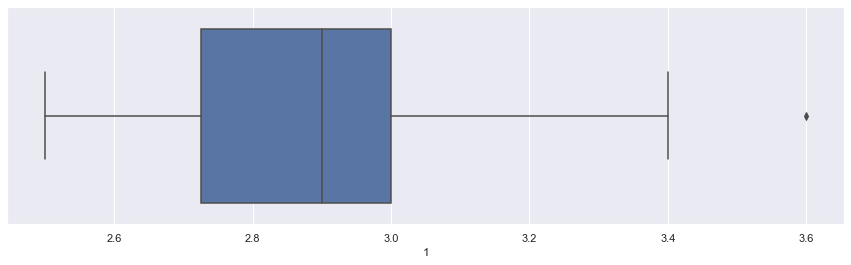

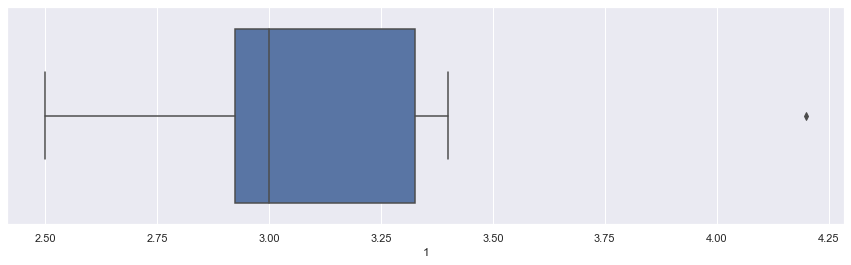

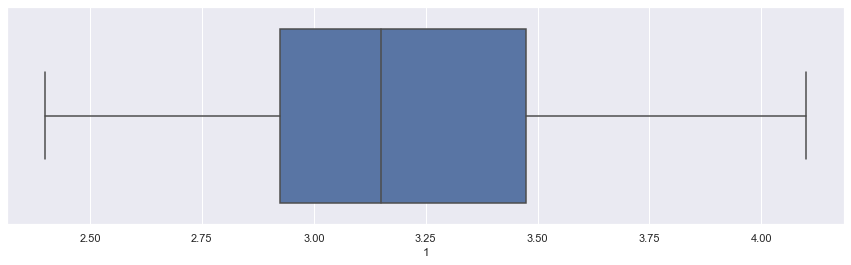

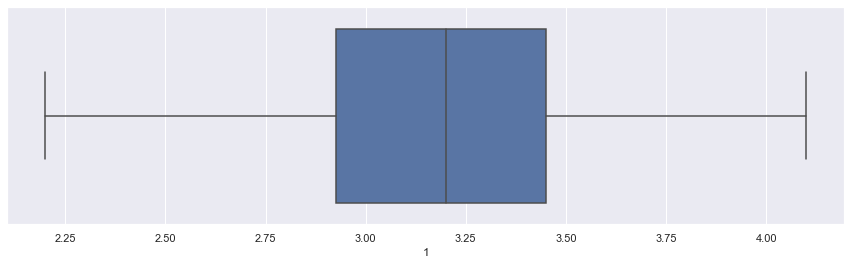

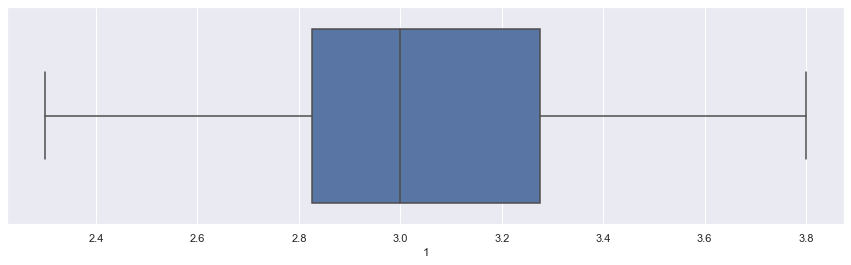

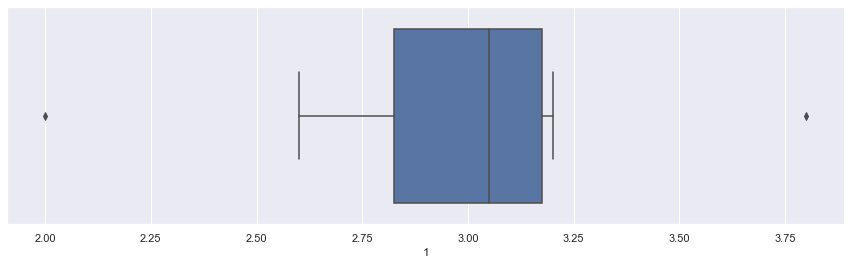

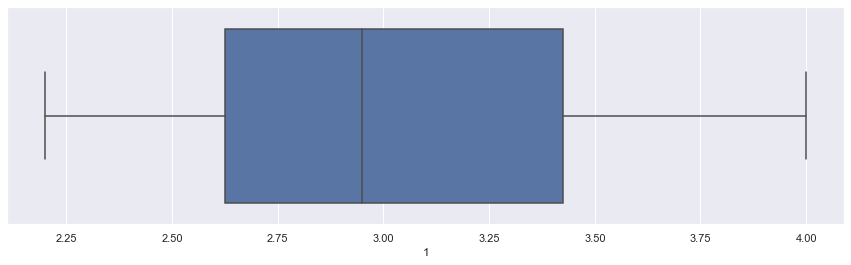

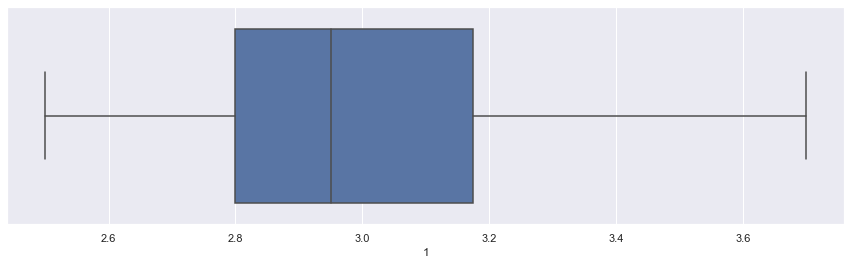

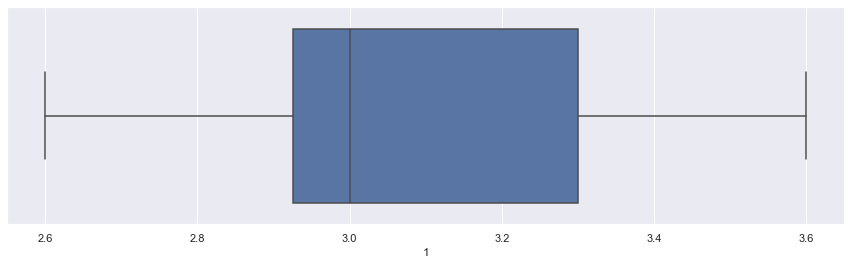

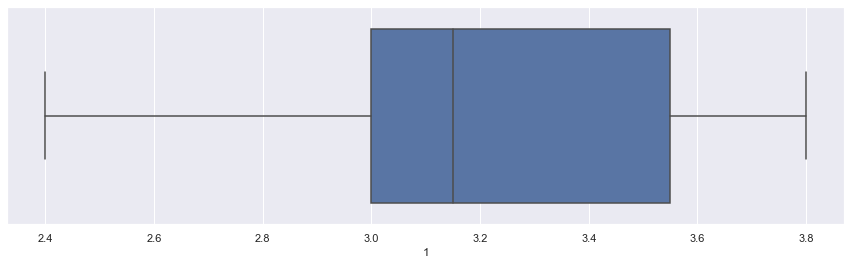

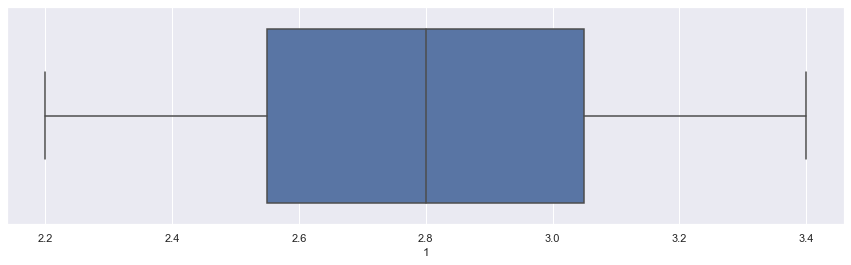

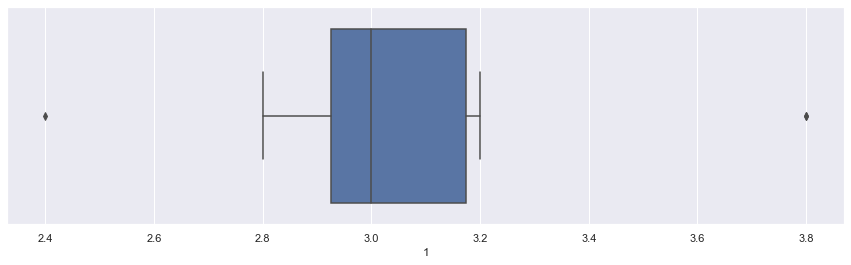

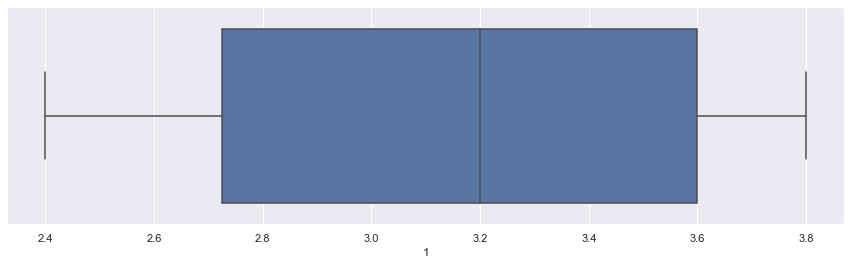

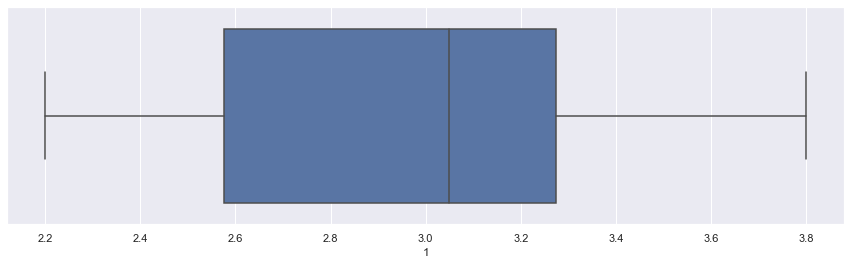

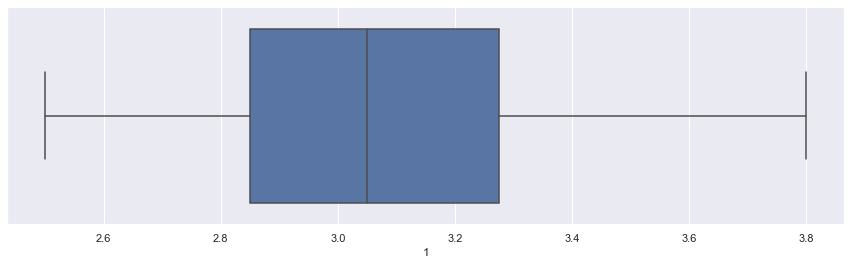

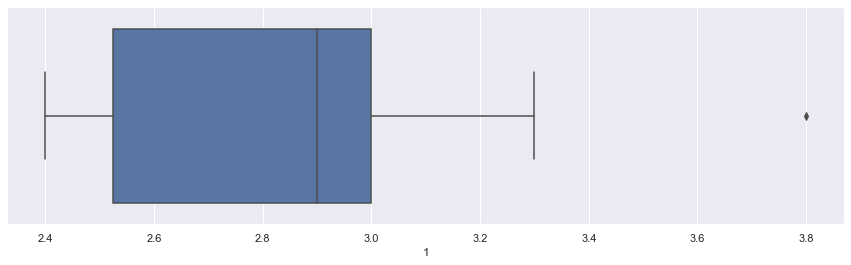

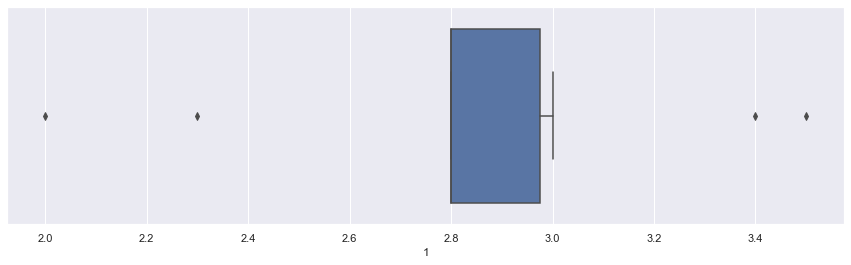

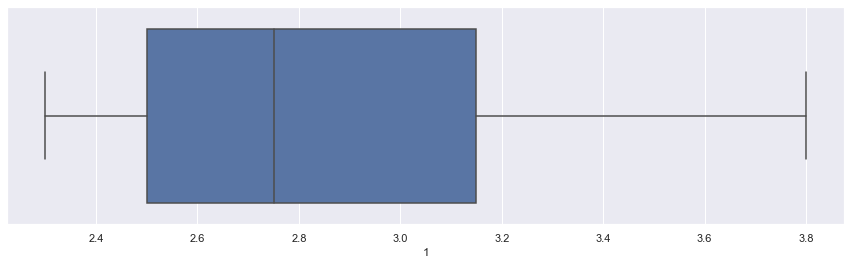

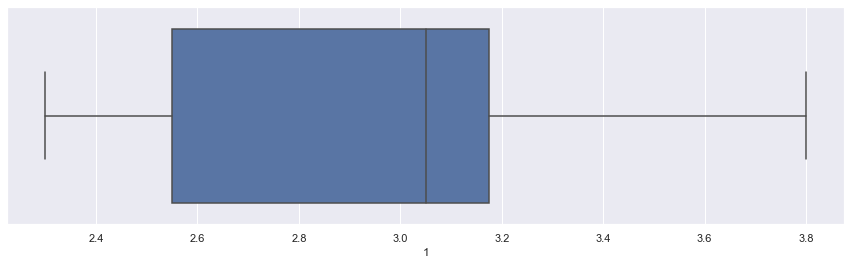

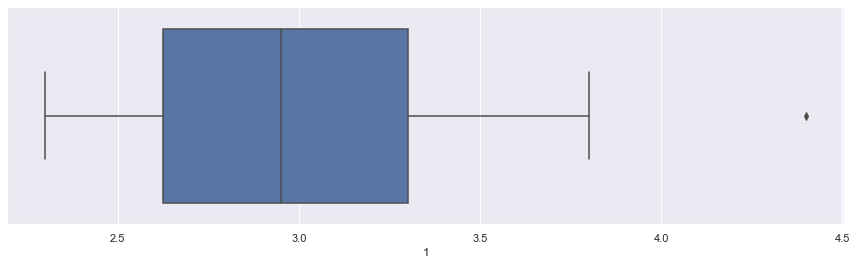

In [65]:
print('-----------ГС-----------')
plt.figure(figsize=(15, 4))
sns.boxplot(df[1]);
plt.show()
print('-----------ВЫБОРКИ-----------')
for i in range(20):
    plt.figure(figsize=(15, 4))
    sns.boxplot(simple_random_sample(df[1], 10));
    plt.show()
    

## Т-рапределение
Если число наблюдений n невелико и σ ГС неизвестно, то используется распределение Стьюдента\
Форма распределения определяется числом степеней свободы df\
Если df увеличивается, то распределение стремится к нормальному

T-распределение используется для проверки гипотез, т.к. почти всегда выборки малы и значение σ ГС неизвестно

Для проверки гипотезы многократно извлекаются выборки из ГС и для каждой расчитывается насколько далеко среднее выборки от среднего ГС
$$z = {x-μ \over {σ \over {\sqrt{n}}}}$$

Но как говорилось ранее, чаще всего нам неизвестно σ, поэтому используют sd(среднее отклонение выборки)
$$z = {x-μ \over {sd \over {\sqrt{n}}}}$$

Например: \
среднее выбокр(обозначим *x) = 10,8\
sd = 2\
n = 25\
μ = 10 

тогда: \
$SE = {sd\over{\sqrt{n}}} = {2\over{\sqrt{25}}} = 0,4$\
$z = {*x-μ \over SE} = {{10.8-10} \over 0.4} = 2$\
И далее через калькулятор преобразовываем z в p-уровень значимости\
p<0.05 => гипотеза об отношении выборки к ГС отклонена(мы считаем что у них слишком разнятся средние)

## Критерий t-Стьюдента
Критерий t-Стьюдента позволяет сравнивать выборки и проверять гипотезы 
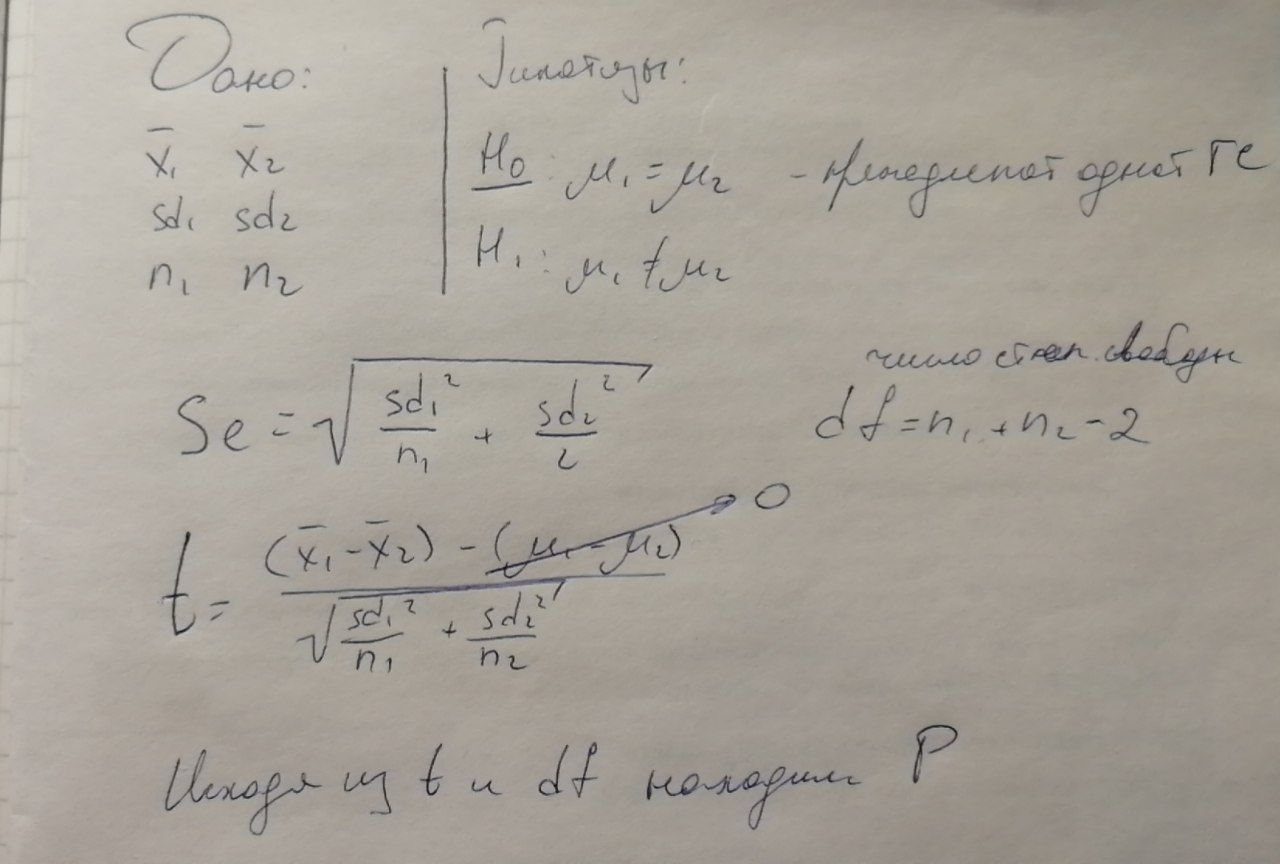
Критерии для использования:
- Данные количественные
- Данные распределены по нормальному закону 
- Выборки независимы

На критерий t-Стьюдента сильно влияют выбросы, для таких лучаев используется критерий Mann-Whitney(U-test)

##  Однофакторный дисперсионный анализ 
- Используется для сравнения более 2 выборок 
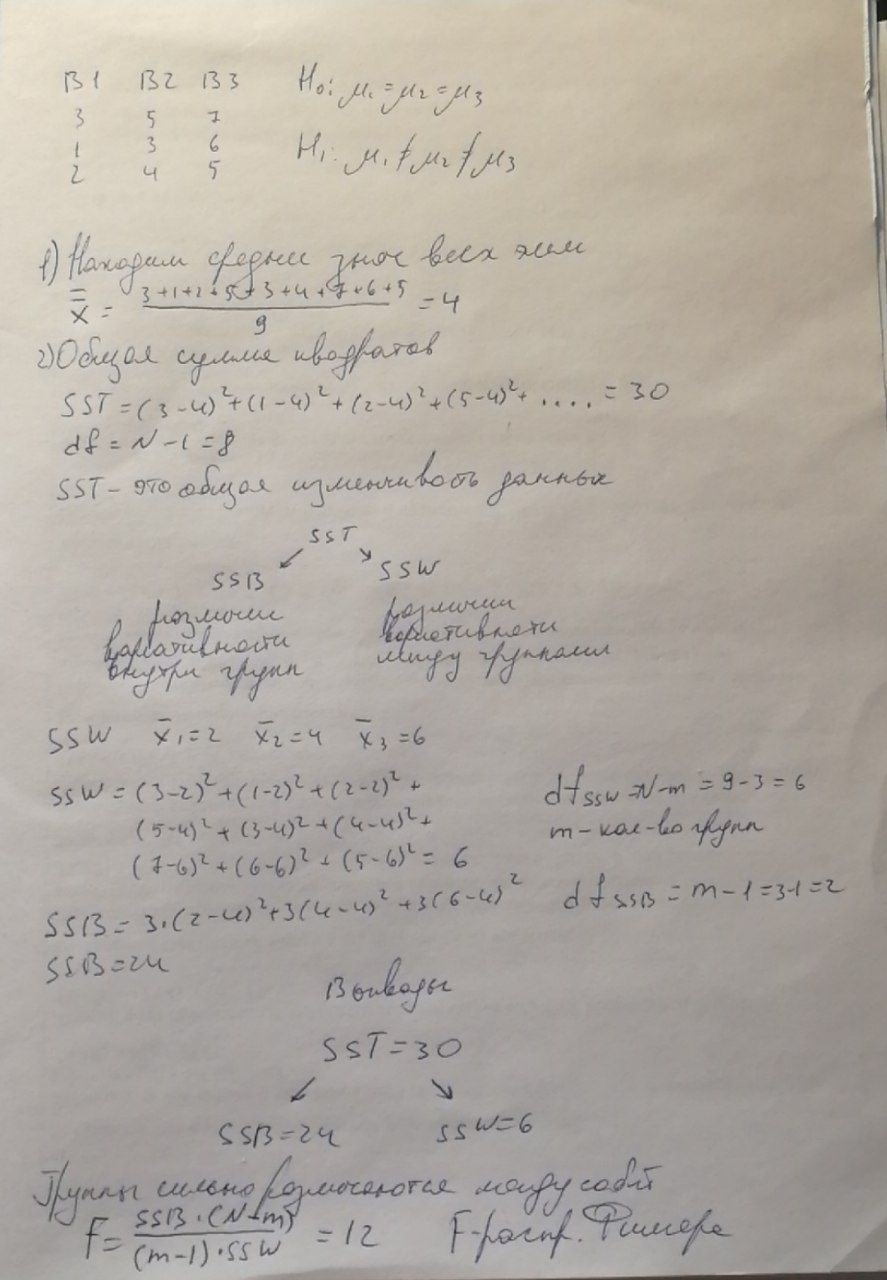

## Понятие корреляции 
Корреляция - это зависимость двух переменных\
Может быть положительной и отрицательной 

In [66]:
from sklearn.datasets import make_regression

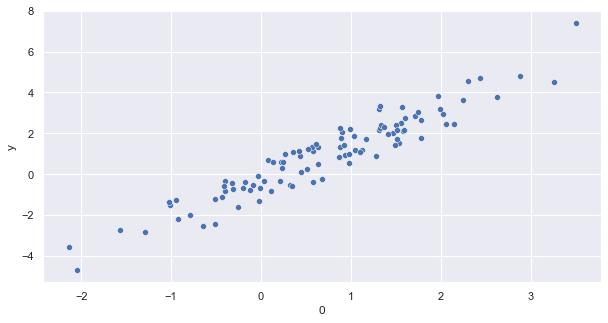

In [88]:
X, y = make_regression(100, 1)
df = pd.DataFrame(X+(np.random.random(X.shape)))
df['y'] = y+(np.random.random(y.shape))
plt.figure(figsize=[10, 5])
sns.scatterplot(df[0], df['y']);

In [99]:
# находим среднее для X и для y 
x_mean = df[0].mean()
y_mean = df['y'].mean()
n = df.shape[0]
# находим сумму произведений разниц каждого значения и его среднего 
sum_cov = ((df[0]-x_mean)*(df['y']-y_mean)).sum()
# делим на степень свободы и получаем коэффициент коверяции
cov_coef = sum_cov/(n-1)
print(f'cov_coef = {cov_coef}')
# делим коэффициент коверяции на произведение нормальных отклонений y и x и получаем коэф корреляции
corr_coef = cov_coef/(df[0].std()*df['y'].std())
print(f'corr_coef = {corr_coef}')
# также можно посмтореть коэф детерминации, который показывает влияние одной дисперсии на другую
print(f'det_coef = {np.square(corr_coef)}')

cov_coef = 2.041682892522986
corr_coef = 0.9494067427949181
det_coef = 0.9013731632644558


- Коэф корреляции используется только для линейных зависимостей 
- Выбросы очень сеильно влияют на корреляцию
- Корреляция не отвечает за причинно-следственную связ, а только показывает зависимость переменных